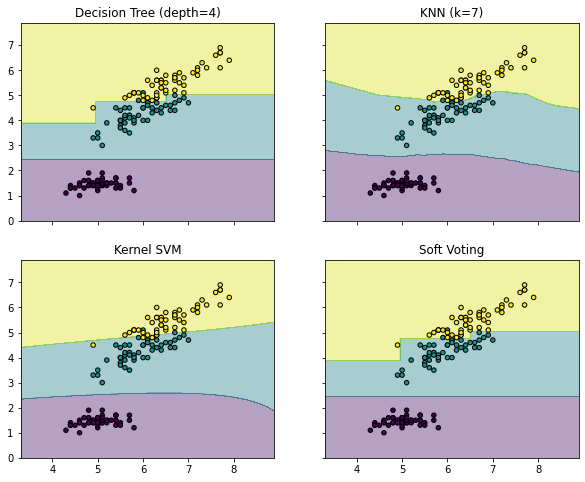

In [1]:
from itertools import product

import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

iris = datasets.load_iris()
X = iris.data[:,[0,2]] #取两列，方便绘图
y = iris.target

clf1 = DecisionTreeClassifier(max_depth=4)
clf2 = KNeighborsClassifier(n_neighbors=7)
clf3 = SVC(kernel='rbf', probability=True)
eclf = VotingClassifier(estimators=[('dt',clf1),('knn',clf2),('svc',clf3)], voting='soft', weights=[2,1,1])
#weights控制每个算法的权重, voting=’soft' 使用了软权重


clf1.fit(X,y)
clf2.fit(X,y)
clf3.fit(X,y)
eclf.fit(X,y)

x_min, x_max = X[:,0].min() -1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() -1, X[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))  #创建网格

fig, axes = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8)) #共享X轴和Y轴

for idx, clf, title in zip(product([0, 1],[0, 1]),
                           [clf1, clf2, clf3, eclf],
                           ['Decision Tree (depth=4)', 'KNN (k=7)',
                            'Kernel SVM', 'Soft Voting']):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]) #起初我以为是预测的X的值，实际上是预测了上面创建的网格的值，以这些值来进行描绘区域
    Z = Z.reshape(xx.shape)
    axes[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axes[idx[0], idx[1]].scatter(X[:, 0],X[:, 1], c=y, s=20, edgecolor='k')
    axes[idx[0], idx[1]].set_title(title)
plt.show()

In [2]:
import numpy as np
import pandas as pd
import warnings
import json

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import cross_val_score, ShuffleSplit

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from xgboost import plot_importance

warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

df = pd.read_csv("../Boxcox_data.csv")
data =df.values

Y = df["Outcome"].values
X = df[['Gender', 'Age', 'Height', 'Weight', 'BMI', 'Hypertension',
       'SBP', 'DBP', 'PR', 'Drink', 'Smoke', 'FPG', 'AST', 'ALT', 'BUN', 'Scr',
       'TG', 'TC']].values
names = ['Gender', 'Age', 'Height', 'Weight', 'BMI', 'Hypertension',
       'SBP', 'DBP', 'PR', 'Drink', 'Smoke', 'FPG', 'AST', 'ALT', 'BUN', 'Scr',
       'TG', 'TC']


sc = 'f1_macro'

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

clfrf = RandomForestClassifier(n_estimators=35, max_depth= 5, max_features= 4)
#clfSVC =  SVC(C= 20, kernel = 'linear', probability= True)
clfSVC = SVC(C= 100, gamma= 'scale', kernel = 'linear', probability= True)
clfGBDT = GradientBoostingClassifier(n_estimators=45, max_depth= 4, max_features= 3)
#clfXGBT = XGBClassifier(n_estimators=35, max_depth= 5, learning_rate= 0.01)
clfXGBT = XGBClassifier(n_estimators=70, max_depth= 6, min_child_weight=1, learning_rate= 0.01)

df_weights = pd.read_csv("../Weight_new.csv")

print(df_weights[df_weights.columns[0]])
df_weights = df_weights.drop([df_weights.columns[0],df_weights.columns[-1]], axis= 1)



0      RF
1     SVM
2    GBDT
3     XGB
Name: blank, dtype: object


In [4]:
from tqdm import tqdm
from sklearn.model_selection import cross_val_score, ShuffleSplit

warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
max_score = 0
max_weights = []
for index, col in tqdm(df_weights.iteritems()):
    #print(col)
    clf_weights = col.values[:4]*10
    print(clf_weights)
    vclf = VotingClassifier(estimators=[('rf',clfrf),('svc',clfSVC),('gbdt',clfGBDT),('xgbt',clfXGBT)], voting='soft', weights= clf_weights)
    score = cross_val_score(vclf, X, Y, cv=ShuffleSplit(10, test_size = .2, train_size = .8), n_jobs = 8, scoring= sc)
    print(score)
    print(sum(score)/len(score))

    if max_score<(sum(score)/len(score)):
        max_weights = clf_weights
        max_score = sum(score)/len(score)

print(max_score, max_weights)    

0it [00:00, ?it/s]

[1. 1. 3. 5.]


1it [00:52, 52.17s/it]

[0.66763707 0.80794393 0.81170669 0.80664176 0.77776829 0.76264726
 0.81170669 0.7250223  0.76936027 0.77267699]
0.7713111243140127
[1. 1. 4. 4.]


2it [01:46, 53.49s/it]

[0.7462963  0.78389373 0.78660436 0.80664176 0.79521674 0.86877395
 0.87767857 0.81639732 0.82503193 0.81231524]
0.8118849892332397
[1. 1. 5. 3.]


3it [02:41, 53.95s/it]

[0.82928349 0.74740417 0.77776829 0.78660436 0.78128991 0.88906883
 0.78128991 0.7405303  0.81160616 0.83306777]
0.797791319202464
[1. 2. 2. 5.]


4it [03:57, 62.87s/it]

[0.85959795 0.82036713 0.83385308 0.7450824  0.76295795 0.81639732
 0.781704   0.80794393 0.8361244  0.73639652]
0.8000424688094123
[1. 2. 3. 4.]


5it [05:09, 66.20s/it]

[0.88263849 0.78875283 0.80316092 0.768053   0.74984784 0.7835703
 0.80418265 0.81170669 0.824795   0.77982143]
0.7996529157460834
[1. 2. 4. 3.]


6it [06:26, 69.66s/it]

[0.79255894 0.78044872 0.80794393 0.76295795 0.75437548 0.82928349
 0.80839161 0.81160616 0.84690294 0.73794423]
0.7932413437459204
[1. 2. 5. 2.]


7it [07:27, 67.11s/it]

[0.74740417 0.77574405 0.7594189  0.82928349 0.81639732 0.79613095
 0.79966136 0.83385884 0.7882223  0.7814992 ]
0.7927620586485894
[1. 3. 1. 5.]


8it [08:22, 63.09s/it]

[0.78483724 0.76264726 0.85729167 0.73794423 0.79966136 0.7882223
 0.81033687 0.80794393 0.79153987 0.82074963]
0.7961174348623432
[1. 3. 2. 4.]


9it [09:16, 60.13s/it]

[0.84288991 0.84351799 0.75311271 0.80664176 0.82928349 0.79966136
 0.83855219 0.82856091 0.86749319 0.76552904]
0.8175242547767454
[1. 3. 3. 3.]


10it [10:09, 58.17s/it]

[0.79255894 0.83799764 0.73754789 0.77319669 0.79521674 0.82395774
 0.86877395 0.80428571 0.86292619 0.81651786]
0.8112979349788352
[1. 3. 4. 2.]


11it [11:03, 56.67s/it]

[0.80040793 0.81160616 0.77069385 0.79800131 0.73904762 0.80316092
 0.79153987 0.80428571 0.86028555 0.76740238]
0.7946431293016165
[1. 3. 5. 1.]


12it [11:55, 55.23s/it]

[0.80040793 0.83207153 0.85189189 0.856011   0.78128991 0.81930889
 0.83690476 0.80794393 0.74741888 0.80316092]
0.8136409624765681
[1. 4. 1. 4.]


13it [12:43, 53.28s/it]

[0.7835703  0.79800131 0.78955453 0.73839768 0.77112459 0.81170669
 0.72309807 0.78483724 0.88777851 0.80839161]
0.7896460514957686
[1. 4. 2. 3.]


14it [13:36, 53.14s/it]

[0.81238588 0.78128991 0.7574848  0.80738588 0.794797   0.79276678
 0.71564965 0.72258567 0.77392739 0.79153987]
0.7749812830724023
[1. 4. 3. 2.]


15it [14:26, 52.00s/it]

[0.90214286 0.84183791 0.80794393 0.77857308 0.81712433 0.84351799
 0.80664176 0.77723577 0.77555701 0.79635135]
0.8146925990771621
[1. 4. 4. 1.]


16it [15:13, 50.59s/it]

[0.82938979 0.80418265 0.81651786 0.80439749 0.77267699 0.8011611
 0.85959795 0.79613095 0.73849417 0.77069385]
0.7993242802284003
[1. 5. 1. 3.]


17it [16:05, 51.11s/it]

[0.78044872 0.84873022 0.80794393 0.80418265 0.75437548 0.81651786
 0.77051926 0.76295795 0.73137255 0.88401447]
0.7961063079358902
[1. 5. 2. 2.]


18it [16:56, 51.11s/it]

[0.79800131 0.77766959 0.79153987 0.81651786 0.77555701 0.82036713
 0.74740417 0.77319669 0.73794423 0.77051926]
0.7808717117348631
[1. 5. 3. 1.]


19it [17:46, 50.57s/it]

[0.78955453 0.87816315 0.79966136 0.84794673 0.82503193 0.83855219
 0.80040793 0.79242424 0.85407791 0.824795  ]
0.8250614959298381
[2. 1. 2. 5.]


20it [18:34, 49.85s/it]

[0.84873022 0.8011611  0.82856091 0.81011781 0.77555701 0.82319322
 0.78660436 0.77112459 0.72900183 0.83323189]
0.800728294373606
[2. 1. 3. 4.]


21it [19:31, 51.97s/it]

[0.84340104 0.84340104 0.82395774 0.83799764 0.76740238 0.76264726
 0.89576993 0.77319669 0.83799764 0.81011781]
0.8195889155256395
[2. 1. 4. 3.]


22it [20:34, 55.26s/it]

[0.8439531  0.79966136 0.74335669 0.77982143 0.82856091 0.82875
 0.79966136 0.77112459 0.83323189 0.81639732]
0.8044518650158263
[2. 1. 5. 2.]


23it [21:20, 52.48s/it]

[0.74703245 0.7979351  0.78955453 0.794797   0.84351799 0.74392523
 0.82395774 0.84690294 0.83385884 0.89158533]
0.8113067157891217
[2. 2. 1. 5.]


24it [22:09, 51.69s/it]

[0.81486486 0.76390023 0.79635135 0.7835703  0.82036713 0.77399321
 0.83534818 0.80316092 0.72900183 0.85321429]
0.7973772293931125
[2. 2. 2. 4.]


25it [23:06, 53.21s/it]

[0.824795   0.824795   0.82044561 0.84794673 0.78044872 0.82928349
 0.82731092 0.70758986 0.7835703  0.76936027]
0.8015545903432836
[2. 2. 3. 3.]


26it [23:58, 52.78s/it]

[0.81639732 0.68577982 0.76295795 0.86568627 0.82345361 0.80418265
 0.81939915 0.82074963 0.85758836 0.7450824 ]
0.8001277167781817
[2. 2. 4. 2.]


27it [24:49, 52.11s/it]

[0.86889952 0.84540736 0.7979351  0.80439749 0.81170669 0.89806548
 0.77112459 0.81033687 0.79153987 0.78893557]
0.8188348536356289
[2. 2. 5. 1.]


28it [25:39, 51.59s/it]

[0.81712433 0.794797   0.80839161 0.75557538 0.81639732 0.80439749
 0.81639732 0.77112459 0.80664176 0.82503193]
0.8015878732793491
[2. 3. 1. 4.]


29it [26:31, 51.85s/it]

[0.79153987 0.82259933 0.7979351  0.824795   0.768053   0.88487395
 0.73891199 0.824795   0.81231524 0.79276678]
0.8058585261448163
[2. 3. 2. 3.]


30it [27:23, 51.70s/it]

[0.83690476 0.77574405 0.83385884 0.72900183 0.86889952 0.87196262
 0.73098267 0.77555701 0.77069385 0.86889952]
0.8062504669320141
[2. 3. 3. 2.]


31it [28:13, 51.20s/it]

[0.79613095 0.79242424 0.84324943 0.79613095 0.81639732 0.7835703
 0.794797   0.69144144 0.83323189 0.75535714]
0.790273067644394
[2. 3. 4. 1.]


32it [29:04, 51.22s/it]

[0.83845805 0.78955453 0.80839161 0.78389373 0.80038854 0.7835703
 0.77399321 0.83323189 0.77504105 0.77069385]
0.7957216763561903
[2. 4. 1. 3.]


33it [29:51, 49.90s/it]

[0.73066841 0.82036713 0.79613095 0.76527698 0.73839768 0.80794393
 0.81170669 0.81170669 0.76740238 0.8464986 ]
0.7896099433090419
[2. 4. 2. 2.]


34it [30:36, 48.38s/it]

[0.72771439 0.77112459 0.85729167 0.78389373 0.84690294 0.82044561
 0.82938979 0.81170669 0.80664176 0.75437548]
0.800948664423556
[2. 4. 3. 1.]


35it [31:27, 49.21s/it]

[0.78137792 0.82319322 0.81170669 0.73098267 0.77723577 0.80316092
 0.76936027 0.74392523 0.82856091 0.76295795]
0.783246154841401
[2. 5. 1. 2.]


36it [32:13, 48.36s/it]

[0.7652648  0.81231524 0.81170669 0.78128991 0.85213782 0.85321429
 0.84032634 0.80418265 0.72323232 0.83337838]
0.8077048426291764
[2. 5. 2. 1.]


37it [32:59, 47.45s/it]

[0.66763707 0.84340104 0.82503193 0.79613095 0.84873022 0.79276678
 0.80316092 0.78044872 0.79311386 0.79545602]
0.7945877502761681
[3. 1. 1. 5.]


38it [33:52, 49.33s/it]

[0.7594189  0.82503193 0.7652648  0.81930889 0.7574848  0.84183791
 0.77555701 0.82044561 0.7611457  0.81238588]
0.7937881433685184
[3. 1. 2. 4.]


39it [34:44, 49.95s/it]

[0.70839574 0.82069868 0.79153987 0.80664176 0.82856091 0.7652648
 0.75311271 0.81548822 0.84127309 0.82503193]
0.7956007704176795
[3. 1. 3. 3.]


40it [35:42, 52.34s/it]

[0.82875    0.79800131 0.84351799 0.78389373 0.86812431 0.86028555
 0.74571673 0.7882223  0.81639732 0.82074963]
0.8153658883786349
[3. 1. 4. 2.]


41it [36:30, 51.13s/it]

[0.85321429 0.81011781 0.82938979 0.79800131 0.7405303  0.83799764
 0.78955453 0.82044561 0.76657807 0.824795  ]
0.8070624347151802
[3. 1. 5. 1.]


42it [37:24, 51.98s/it]

[0.76527698 0.79966136 0.76740238 0.77982143 0.77574405 0.80316092
 0.84183791 0.79966136 0.82856091 0.82928349]
0.7990410784040872
[3. 2. 1. 4.]


43it [38:16, 51.98s/it]

[0.77069385 0.76936027 0.76740238 0.79966136 0.86937452 0.82074963
 0.83385308 0.80839161 0.78389373 0.83840977]
0.8061790205819003
[3. 2. 2. 3.]


44it [39:10, 52.55s/it]

[0.78660436 0.84690294 0.817916   0.82928349 0.79153987 0.71880131
 0.82036713 0.82074963 0.82856091 0.73639652]
0.7997122171002328
[3. 2. 3. 2.]


45it [39:58, 51.26s/it]

[0.85729167 0.85213782 0.85189189 0.82044561 0.85959795 0.81238588
 0.84288991 0.75304636 0.84032634 0.80664176]
0.8296655185380736
[3. 2. 4. 1.]


46it [40:47, 50.65s/it]

[0.83799764 0.7652648  0.7611457  0.794797   0.75311271 0.80316092
 0.81651786 0.83385884 0.78660436 0.79311386]
0.7945573695017265
[3. 3. 1. 3.]


47it [41:38, 50.67s/it]

[0.78389373 0.84351799 0.85182782 0.7835703  0.824795   0.85729167
 0.75311271 0.78483724 0.74703245 0.7997076 ]
0.8029586507152701
[3. 3. 2. 2.]


48it [42:26, 49.91s/it]

[0.76936027 0.78483724 0.86568627 0.7594189  0.86889952 0.82503193
 0.7611457  0.82928349 0.80316092 0.83323189]
0.8100056136534018
[3. 3. 3. 1.]


49it [43:19, 50.90s/it]

[0.82717128 0.88119827 0.85742038 0.77555701 0.81170669 0.84032634
 0.81930889 0.81160616 0.78128991 0.81011781]
0.8215702735124001
[3. 4. 1. 2.]


50it [44:08, 50.19s/it]

[0.77319669 0.81597738 0.72258567 0.83385884 0.81639732 0.86877395
 0.83855219 0.76527698 0.76740238 0.81639732]
0.8018418712340176
[3. 4. 2. 1.]


51it [45:01, 51.20s/it]

[0.78660436 0.75535714 0.73839768 0.84340104 0.81651786 0.7462963
 0.83690476 0.81651786 0.82503193 0.81639732]
0.7981426237792777
[3. 5. 1. 1.]


52it [45:48, 49.71s/it]

[0.80664176 0.81170669 0.82395774 0.78875283 0.81231524 0.82559464
 0.7882223  0.85742038 0.86161616 0.80316092]
0.8179388663865232
[4. 1. 1. 4.]


53it [46:38, 50.08s/it]

[0.7574848  0.80040793 0.75159637 0.82503193 0.7835703  0.89536279
 0.75602212 0.68277459 0.78483724 0.80439749]
0.7841485553386325
[4. 1. 2. 3.]


54it [47:25, 48.94s/it]

[0.78660436 0.80428571 0.77776829 0.76264726 0.82928349 0.76936027
 0.82319322 0.81548822 0.82319322 0.84183791]
0.8033661947291219
[4. 1. 3. 2.]


55it [48:20, 50.96s/it]

[0.81238588 0.79966136 0.83690476 0.83845805 0.73754789 0.82036713
 0.75535714 0.794797   0.73904762 0.81712433]
0.7951651171793542
[4. 1. 4. 1.]


56it [49:23, 54.48s/it]

[0.84288991 0.794797   0.75159637 0.85062305 0.80664176 0.82856091
 0.78638254 0.81231524 0.79099924 0.75535714]
0.8020163163940047
[4. 2. 1. 3.]


57it [50:15, 53.58s/it]

[0.82044561 0.7423456  0.81651786 0.82503193 0.79613095 0.88777851
 0.72924901 0.84690294 0.76936027 0.82044561]
0.8054208276838976
[4. 2. 2. 2.]


58it [51:04, 52.45s/it]

[0.82069868 0.84540736 0.80738588 0.82036713 0.85062305 0.76295795
 0.77776829 0.81011781 0.79800131 0.84032634]
0.813365380907791
[4. 2. 3. 1.]


59it [51:58, 52.89s/it]

[0.73839768 0.82938979 0.81712433 0.84351799 0.76487414 0.73098267
 0.82503193 0.84928493 0.84794673 0.86028555]
0.8106835727293283
[4. 3. 1. 2.]


60it [52:48, 51.99s/it]

[0.79966136 0.73098267 0.85959795 0.81360544 0.78044872 0.88401447
 0.89763387 0.81597738 0.794797   0.81160616]
0.8188325019827912
[4. 3. 2. 1.]


61it [53:43, 52.68s/it]

[0.81930889 0.794797   0.80439749 0.77319669 0.82455391 0.78389373
 0.77574405 0.77267699 0.76390023 0.84340104]
0.7955870019328747
[4. 4. 1. 1.]


62it [54:33, 51.95s/it]

[0.82074963 0.86877395 0.83869702 0.80812325 0.81011781 0.7611457
 0.84340104 0.82395774 0.78955453 0.79800131]
0.8162521979162367
[5. 1. 1. 3.]


63it [55:21, 50.78s/it]

[0.83840977 0.86601971 0.88119827 0.84794673 0.87158411 0.81548822
 0.77555701 0.86889952 0.7835703  0.83799764]
0.8386671262526552
[5. 1. 2. 2.]


64it [56:08, 49.84s/it]

[0.75311271 0.82044561 0.81170669 0.77267699 0.83690476 0.85321429
 0.82938979 0.77399321 0.82074963 0.80418265]
0.8076376329668331
[5. 1. 3. 1.]


65it [57:02, 50.88s/it]

[0.77555701 0.81360544 0.7882223  0.84928493 0.82928349 0.83690476
 0.79242424 0.78389373 0.77392739 0.82044561]
0.8063548913917267
[5. 2. 1. 2.]


66it [57:59, 52.75s/it]

[0.80439749 0.76552904 0.78638254 0.78638254 0.73034024 0.78955453
 0.83323189 0.85407791 0.80794393 0.74703245]
0.7904872543723668
[5. 2. 2. 1.]


67it [58:49, 52.68s/it]

[0.76487414 0.72309807 0.7814992  0.88263849 0.80794393 0.73098267
 0.77857308 0.84183791 0.90020396 0.82044561]
0.8032097061205317
0.8386671262526552 [5. 1. 1. 3.]


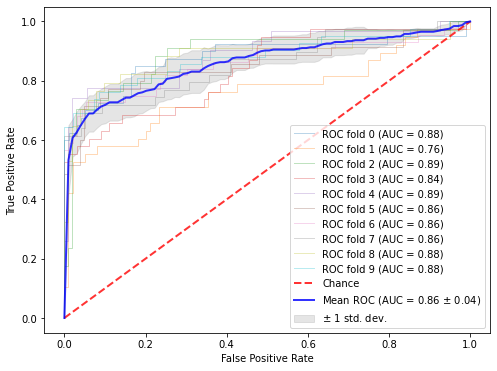

In [5]:
from numpy import interp
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

#if len(Y)
n_classes = Y.shape
cv = ShuffleSplit(10, test_size = .2, train_size = .8)
classifier = VotingClassifier(estimators=[('rf',clfrf),('svc',clfSVC),('gbdt',clfGBDT),('xgbt',clfXGBT)], voting='soft', weights= max_weights)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

plt.figure(figsize=(8, 6))
i = 0
for train, test in cv.split(X, Y):
    y_score = classifier.fit(X[train], Y[train]).predict_proba(X[test])
    # y_score.shape==(75, 3)
    #if len(y_score.shape)<= 1 :
    #    y_score = y_score[:, np.newaxis]
    # 为每个类别计算ROC曲线和AUC
    fpr, tpr, thresholds = roc_curve(Y[test], y_score[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [6]:
from tqdm import tqdm
from sklearn.model_selection import cross_val_score, ShuffleSplit

warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
max_score = 0
max_weights = []
for index, col in tqdm(df_weights.iteritems()):
    #print(col)
    clf_weights = col.values[:4]*10
    print(clf_weights)
    vclf = VotingClassifier(estimators=[('rf',clfrf),('svc',clfSVC),('gbdt',clfGBDT),('xgbt',clfXGBT)], voting='hard', weights= clf_weights)
    score = cross_val_score(vclf, X, Y, cv=ShuffleSplit(10, test_size = .2, train_size = .8), n_jobs = 8, scoring= sc)
    print(score)
    print(sum(score)/len(score))

    if max_score<(sum(score)/len(score)):
        max_weights = clf_weights
        max_score = sum(score)/len(score)

print(max_score, max_weights)

0it [00:00, ?it/s]

[1. 1. 3. 5.]


1it [00:47, 47.38s/it]

[0.87586832 0.77555701 0.77783784 0.80038854 0.72752015 0.77280265
 0.85959795 0.77267699 0.7882223  0.81033687]
0.7960808626372964
[1. 1. 4. 4.]


2it [01:29, 44.38s/it]

[0.81170669 0.86533421 0.81011781 0.78955453 0.84873022 0.82044561
 0.78893557 0.80439749 0.81160616 0.85182782]
0.8202656100773391
[1. 1. 5. 3.]


3it [02:14, 44.54s/it]

[0.79099924 0.81231524 0.82856091 0.78137792 0.82395774 0.73891199
 0.75311271 0.81548822 0.82731092 0.82395774]
0.7995992626736126
[1. 2. 2. 5.]


4it [03:01, 45.47s/it]

[0.856011   0.7594189  0.73639652 0.76527698 0.79153987 0.84183791
 0.78128991 0.7594189  0.75535714 0.84183791]
0.7888385049335007
[1. 2. 3. 4.]


5it [03:53, 47.88s/it]

[0.7462963  0.79276678 0.69446922 0.78389373 0.79966136 0.80316092
 0.85407791 0.82074963 0.82559464 0.79276678]
0.7913437261606406
[1. 2. 4. 3.]


6it [04:39, 47.38s/it]

[0.86292619 0.82717128 0.77574405 0.80839161 0.88468013 0.82259933
 0.82875    0.83128079 0.7423456  0.7611457 ]
0.8145034677117853
[1. 2. 5. 2.]


7it [05:30, 48.32s/it]

[0.77776829 0.82044561 0.80664176 0.86292619 0.80316092 0.80439749
 0.87133954 0.77112459 0.7611457  0.69884815]
0.7977798242198941
[1. 3. 1. 5.]


8it [06:21, 49.31s/it]

[0.78660436 0.80392558 0.76936027 0.71517672 0.81548822 0.87816315
 0.89158533 0.82928349 0.74984784 0.79613095]
0.8035565903278309
[1. 3. 2. 4.]


9it [07:02, 46.65s/it]

[0.78893557 0.7462963  0.77555701 0.84845133 0.81548822 0.75159637
 0.7462963  0.7835703  0.78483724 0.82319322]
0.7864221846571792
[1. 3. 3. 3.]


10it [07:47, 46.29s/it]

[0.7478837  0.81651786 0.73098267 0.81548822 0.7835703  0.81597738
 0.78955453 0.79153987 0.82856091 0.82875   ]
0.7948825424395803
[1. 3. 4. 2.]


11it [08:32, 45.82s/it]

[0.80664176 0.82044561 0.77319669 0.76740238 0.7670068  0.84340104
 0.81011781 0.78955453 0.80664176 0.81011781]
0.7994526187473834
[1. 3. 5. 1.]


12it [09:22, 47.00s/it]

[0.78044872 0.82559464 0.7882223  0.81651786 0.83690476 0.83385308
 0.75535714 0.79276678 0.79660657 0.794797  ]
0.8021068863359236
[1. 4. 1. 4.]


13it [10:13, 48.17s/it]

[0.82259933 0.83207153 0.72323232 0.83385884 0.856011   0.84351799
 0.824795   0.79966136 0.80664176 0.83799764]
0.818038676343795
[1. 4. 2. 3.]


14it [11:05, 49.47s/it]

[0.77319669 0.7574848  0.78893557 0.82044561 0.77857308 0.77112459
 0.88663206 0.79276678 0.80439749 0.83385884]
0.8007415509787925
[1. 4. 3. 2.]


15it [11:51, 48.26s/it]

[0.80794393 0.76048951 0.81360544 0.78893557 0.78044872 0.80316092
 0.83690476 0.79635135 0.77555701 0.79276678]
0.7956163991347991
[1. 4. 4. 1.]


16it [12:36, 47.27s/it]

[0.77112459 0.83840977 0.7462963  0.80428571 0.8464986  0.73891199
 0.768053   0.82044561 0.77776829 0.78128991]
0.789308377253785
[1. 5. 1. 3.]


17it [13:24, 47.63s/it]

[0.79521674 0.78955453 0.78875283 0.82044561 0.794797   0.74740417
 0.79242424 0.73089286 0.82455391 0.7423456 ]
0.7826387503313453
[1. 5. 2. 2.]


18it [14:09, 46.77s/it]

[0.77776829 0.87370944 0.794797   0.74703245 0.7835703  0.79242424
 0.68419705 0.84324943 0.77555701 0.82938979]
0.7901694997377249
[1. 5. 3. 1.]


19it [14:55, 46.47s/it]

[0.76565173 0.77319669 0.81170669 0.78128991 0.80038854 0.74741888
 0.79966136 0.781704   0.77112459 0.78660436]
0.781874674360157
[2. 1. 2. 5.]


20it [15:37, 45.15s/it]

[0.8011611  0.80040793 0.75632411 0.83855219 0.81360544 0.81930889
 0.86877395 0.80418265 0.82077446 0.83207153]
0.8155162248273375
[2. 1. 3. 4.]


21it [16:26, 46.49s/it]

[0.89064496 0.85062305 0.81170669 0.84288991 0.79521674 0.86028555
 0.76264726 0.82319322 0.82074963 0.77857308]
0.8236530081993312
[2. 1. 4. 3.]


22it [17:15, 47.28s/it]

[0.85062305 0.76264726 0.82395774 0.84340104 0.7574848  0.82928349
 0.81231524 0.81047431 0.79966136 0.75437548]
0.8044223760258987
[2. 1. 5. 2.]


23it [18:05, 48.04s/it]

[0.79800131 0.77319669 0.78660436 0.77982143 0.82875    0.82036713
 0.78128991 0.824795   0.85729167 0.7462963 ]
0.7996413800881037
[2. 2. 1. 5.]


24it [18:52, 47.79s/it]

[0.876431   0.75159637 0.82455391 0.78893557 0.74703245 0.84928493
 0.856011   0.80839161 0.85407791 0.86028555]
0.8216600293579397
[2. 2. 2. 4.]


25it [19:40, 47.86s/it]

[0.90020396 0.80794393 0.71419501 0.79966136 0.77555701 0.781704
 0.72216077 0.83799764 0.80664176 0.84288991]
0.798895533972228
[2. 2. 3. 3.]


26it [20:26, 47.23s/it]

[0.85959795 0.77574405 0.7652648  0.7652648  0.7979351  0.7462963
 0.81238588 0.7882223  0.80812325 0.79255894]
0.791139336971943
[2. 2. 4. 2.]


27it [21:17, 48.18s/it]

[0.80723618 0.77112459 0.80664176 0.80738588 0.83323189 0.78955453
 0.7478837  0.85213782 0.82928349 0.76740238]
0.8011882220792813
[2. 2. 5. 1.]


28it [22:02, 47.34s/it]

[0.77319669 0.79276678 0.85471898 0.80664176 0.81011781 0.85062305
 0.75535714 0.79966136 0.81160616 0.83855219]
0.8093241918936809
[2. 3. 1. 4.]


29it [22:47, 46.80s/it]

[0.77555701 0.9203819  0.81231524 0.88401447 0.79242424 0.80812325
 0.80392558 0.84032634 0.7594189  0.82503193]
0.8221518857528402
[2. 3. 2. 3.]


30it [23:35, 46.90s/it]

[0.86307824 0.8011611  0.82503193 0.856011   0.84183791 0.84794673
 0.78492936 0.6893424  0.8464986  0.81170669]
0.8167543951841475
[2. 3. 3. 2.]


31it [24:26, 48.19s/it]

[0.77555701 0.76264726 0.79800131 0.84794673 0.75535714 0.79099924
 0.76264726 0.87492392 0.76936027 0.79800131]
0.7935441453282268
[2. 3. 4. 1.]


32it [25:09, 46.78s/it]

[0.71564965 0.78525182 0.71419501 0.84288991 0.80428571 0.80664176
 0.794797   0.78389373 0.75535714 0.86749319]
0.7870454928826739
[2. 4. 1. 3.]


33it [25:57, 46.98s/it]

[0.72081514 0.81651786 0.82036713 0.78875283 0.76740238 0.81170669
 0.75437548 0.80794393 0.82074963 0.84873022]
0.7957361282778612
[2. 4. 2. 2.]


34it [26:42, 46.53s/it]

[0.79613095 0.78389373 0.77051926 0.79242424 0.83323189 0.75535714
 0.80316092 0.8011611  0.79242424 0.80439749]
0.7932700977524297
[2. 4. 3. 1.]


35it [27:34, 48.21s/it]

[0.77574405 0.83385884 0.82069868 0.7997076  0.84794673 0.84794673
 0.82036713 0.77069385 0.84540736 0.83385884]
0.8196229806973653
[2. 5. 1. 2.]


36it [28:19, 46.99s/it]

[0.82938979 0.7594189  0.65856698 0.80316092 0.74392523 0.74741888
 0.73904762 0.7882223  0.77574405 0.6893424 ]
0.7534237074695025
[2. 5. 2. 1.]


37it [29:02, 45.90s/it]

[0.78389373 0.81639732 0.74525022 0.7462963  0.75159637 0.7462963
 0.78875283 0.74392523 0.77776829 0.76936027]
0.7669536869214152
[3. 1. 1. 5.]


38it [29:46, 45.29s/it]

[0.82074963 0.794797   0.79800131 0.8433689  0.7835703  0.83799764
 0.81238588 0.79660657 0.80418265 0.83799764]
0.8129657528745321
[3. 1. 2. 4.]


39it [30:32, 45.50s/it]

[0.83385884 0.82395774 0.82044561 0.72323232 0.76936027 0.82044561
 0.79242424 0.80418265 0.83337838 0.80428571]
0.8025571378162875
[3. 1. 3. 3.]


40it [31:18, 45.83s/it]

[0.794797   0.84536327 0.78128991 0.7835703  0.80418265 0.85742038
 0.82503193 0.74703245 0.73497024 0.78525182]
0.7958909961430395
[3. 1. 4. 2.]


41it [32:05, 46.00s/it]

[0.82069868 0.824795   0.74392523 0.75632411 0.80040793 0.72309807
 0.7882223  0.83323189 0.80664176 0.83210784]
0.7929452823622661
[3. 1. 5. 1.]


42it [32:47, 44.93s/it]

[0.8361244  0.80439749 0.71567688 0.79800131 0.81597738 0.75602212
 0.85182782 0.79800131 0.85182782 0.85742038]
0.8085276910647027
[3. 2. 1. 4.]


43it [33:39, 47.03s/it]

[0.82503193 0.82731092 0.76936027 0.79276678 0.80664176 0.72323232
 0.81170669 0.80428571 0.80794393 0.86601971]
0.8034300017397609
[3. 2. 2. 3.]


44it [34:24, 46.43s/it]

[0.82503193 0.75620224 0.73639652 0.73440529 0.79613095 0.81011781
 0.86877395 0.78128991 0.71567688 0.78128991]
0.7805315395024994
[3. 2. 3. 2.]


45it [35:13, 47.19s/it]

[0.84183791 0.77319669 0.794797   0.79800131 0.7652648  0.80316092
 0.81712433 0.85959795 0.81651786 0.8011611 ]
0.8070659876821182
[3. 2. 4. 1.]


46it [35:58, 46.42s/it]

[0.84340104 0.89330218 0.83845805 0.81011781 0.8011611  0.85959795
 0.83799764 0.84845133 0.82455391 0.82856091]
0.8385601921278854
[3. 3. 1. 3.]


47it [36:44, 46.35s/it]

[0.79153987 0.81011781 0.82074963 0.80418265 0.79613095 0.77857308
 0.87370944 0.81238588 0.78128991 0.76295795]
0.803163717076
[3. 3. 2. 2.]


48it [37:28, 45.67s/it]

[0.78044872 0.78044872 0.82044561 0.74081081 0.78638254 0.80418265
 0.82074963 0.77112459 0.81639732 0.90743243]
0.802842302490606
[3. 3. 3. 1.]


49it [38:13, 45.54s/it]

[0.79966136 0.88906883 0.81238588 0.72771439 0.82856091 0.89576993
 0.76048951 0.86601971 0.83207153 0.84928493]
0.8261026973237333
[3. 4. 1. 2.]


50it [39:05, 47.32s/it]

[0.74703245 0.83306777 0.83306777 0.80794393 0.82395774 0.82938979
 0.82455391 0.75535714 0.78660436 0.81011781]
0.8051092658879707
[3. 4. 2. 1.]


51it [39:52, 47.19s/it]

[0.83385884 0.82731092 0.75535714 0.76740238 0.76390023 0.81170669
 0.81238588 0.80664176 0.82928349 0.85182782]
0.80596751437006
[3. 5. 1. 1.]


52it [40:36, 46.51s/it]

[0.81238588 0.7405303  0.72323232 0.80316092 0.74703245 0.80794393
 0.8011611  0.75437548 0.82044561 0.77555701]
0.7785825000305853
[4. 1. 1. 4.]


53it [41:24, 46.74s/it]

[0.82856091 0.81170669 0.82044561 0.79508547 0.85321429 0.78955453
 0.82938979 0.81548822 0.79800131 0.78638254]
0.8127829346348298
[4. 1. 2. 3.]


54it [42:12, 47.32s/it]

[0.77857308 0.81639732 0.79800131 0.82503193 0.79613095 0.83385884
 0.84873022 0.81548822 0.73754789 0.75437548]
0.8004135235202614
[4. 1. 3. 2.]


55it [43:00, 47.31s/it]

[0.86331066 0.82875    0.80040793 0.77555701 0.79099924 0.82856091
 0.74692118 0.78875283 0.78638254 0.78638254]
0.7996024834292976
[4. 1. 4. 1.]


56it [43:46, 47.12s/it]

[0.77555701 0.80040793 0.81597738 0.84928493 0.82875    0.81548822
 0.82717128 0.84288991 0.83855219 0.78128991]
0.8175368741838509
[4. 2. 1. 3.]


57it [44:36, 47.93s/it]

[0.7882223  0.84540736 0.76390023 0.80439749 0.81639732 0.83799764
 0.82717128 0.77574405 0.85182782 0.82044561]
0.8131511080415541
[4. 2. 2. 2.]


58it [45:31, 49.99s/it]

[0.88263849 0.83799764 0.82074963 0.80418265 0.81011781 0.76264726
 0.77723577 0.85729167 0.81548822 0.81639732]
0.8184746461181087
[4. 2. 3. 1.]


59it [46:19, 49.42s/it]

[0.86568627 0.84873022 0.85959795 0.81360544 0.79800131 0.81486486
 0.80058224 0.79800131 0.88132363 0.83385884]
0.831425208387375
[4. 3. 1. 2.]


60it [47:02, 47.43s/it]

[0.7652648  0.76936027 0.78339921 0.81651786 0.78955453 0.79521674
 0.81170669 0.82455391 0.83690476 0.72323232]
0.7915711092053302
[4. 3. 2. 1.]


61it [47:55, 49.06s/it]

[0.77267699 0.73904762 0.83845805 0.81360544 0.81639732 0.77112459
 0.81170669 0.876431   0.81651786 0.7611457 ]
0.8017111261881729
[4. 4. 1. 1.]


62it [48:42, 48.37s/it]

[0.76936027 0.79153987 0.77319669 0.7979351  0.7423456  0.78660436
 0.80418265 0.781704   0.80738588 0.75535714]
0.7809611566471684
[5. 1. 1. 3.]


63it [49:24, 46.48s/it]

[0.88487395 0.81930889 0.86601971 0.82875    0.80418265 0.78638254
 0.81170669 0.77399321 0.82928349 0.79311386]
0.8197614982811803
[5. 1. 2. 2.]


64it [50:04, 44.67s/it]

[0.82074963 0.7979351  0.86601971 0.7611457  0.82074963 0.7835703
 0.85959795 0.77267699 0.77857308 0.77555701]
0.80365751165651
[5. 1. 3. 1.]


65it [51:00, 48.10s/it]

[0.82875    0.7611457  0.77069385 0.80839161 0.82074963 0.76048951
 0.75159637 0.77982143 0.83799764 0.82731092]
0.7946946671232404
[5. 2. 1. 2.]


66it [51:43, 46.56s/it]

[0.75159637 0.83799764 0.86331066 0.82036713 0.81170669 0.86292619
 0.80723618 0.78955453 0.78389373 0.78044872]
0.8109037838413308
[5. 2. 2. 1.]


67it [52:42, 47.19s/it]

[0.8011611  0.83799764 0.86889952 0.77319669 0.82395774 0.75535714
 0.77267699 0.78389373 0.80839161 0.79242424]
0.8017956403681279
0.8385601921278854 [3. 2. 4. 1.]


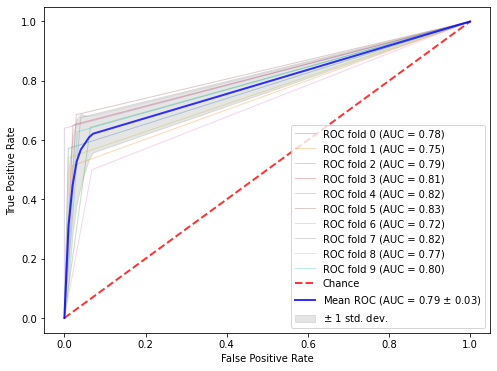

In [7]:
from numpy import interp
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

#if len(Y)
n_classes = Y.shape
cv = ShuffleSplit(10, test_size = .2, train_size = .8)
classifier = VotingClassifier(estimators=[('rf',clfrf),('svc',clfSVC),('gbdt',clfGBDT),('xgbt',clfXGBT)], voting='hard', weights= max_weights)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

plt.figure(figsize=(8, 6))
i = 0
for train, test in cv.split(X, Y):
    y_score = classifier.fit(X[train], Y[train]).predict(X[test])
    # y_score.shape==(75, 3)
    if len(y_score.shape)<= 1 :
        y_score = y_score[:, np.newaxis]
    # 为每个类别计算ROC曲线和AUC
    fpr, tpr, thresholds = roc_curve(Y[test], y_score[:, 0])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [8]:
y_score[:,0]

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1])

In [9]:
Y[test]

array([0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1])